D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.7745 - loss: 0.5959 - val_accuracy: 0.8110 - val_loss: 0.6854
Epoch 2/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9298 - loss: 0.3576 - val_accuracy: 0.8320 - val_loss: 0.6787
Epoch 3/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9438 - loss: 0.2617 - val_accuracy: 0.8766 - val_loss: 0.6710
Epoch 4/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9553 - loss: 0.2090 - val_accuracy: 0.9134 - val_loss: 0.6608
Epoch 5/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9429 - loss: 0.1811 - val_accuracy: 0.7060 - val_loss: 0.6437
Epoch 6/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9577 - loss: 0.1541 - val_accuracy: 0.7113 - val_loss: 0.6159
Epoch 7/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9482 - loss: 0.1578 - val_accuracy: 0.9475 - val_loss: 0.5640
Epoch 8/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9482 - loss: 0.1377 - val_accuracy: 0

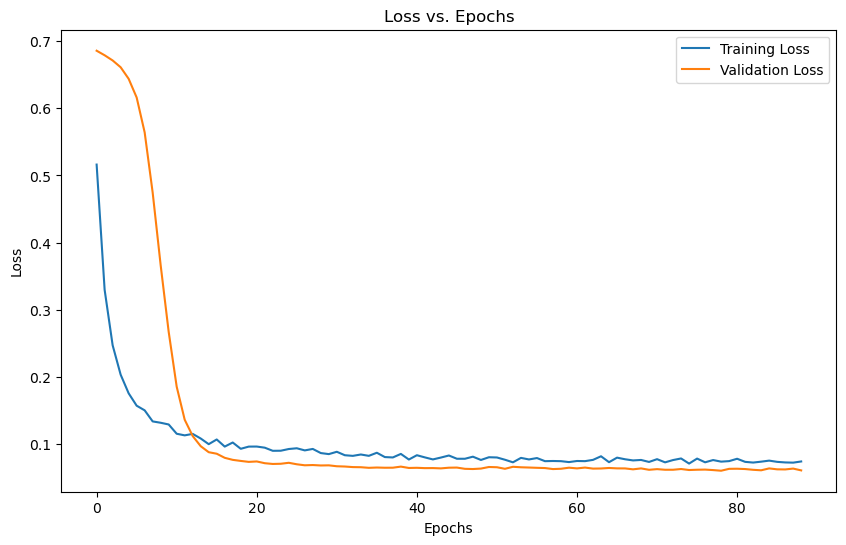

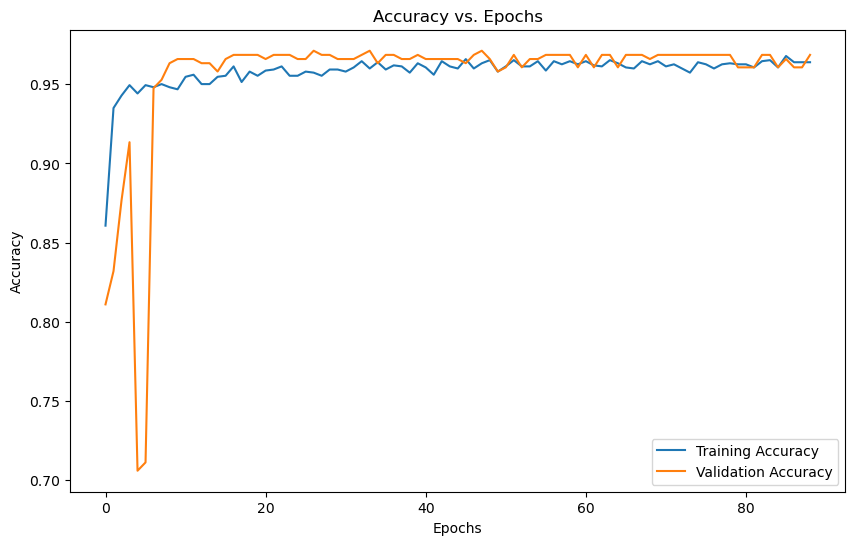

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load data
normal_data = pd.read_csv('Normal.csv')
vulnerable_data = pd.read_csv('vulnerable.csv')

# Label data
normal_data['target'] = 0
vulnerable_data['target'] = 1

# Concatenate and shuffle data
data = pd.concat([normal_data, vulnerable_data], axis=0)
data = data.sample(frac=1).reset_index(drop=True)

# Prepare features and target
X = data.drop(columns=['target', 'Time'])
y = data['target']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(LSTM(units=128, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(LSTM(units=64))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [80]:
normal_data = pd.read_csv('Normal.csv')
vulnerable_data = pd.read_csv('vulnerable.csv')

In [82]:
normal_data['target'] = 0
vulnerable_data['target'] = 1

In [84]:
data = pd.concat([normal_data, vulnerable_data], axis=0)
data = data.sample(frac=1).reset_index(drop=True)

In [86]:
X = data.drop(columns=['target', 'Time'])
y = data['target']

In [88]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [92]:
model = Sequential()
model.add(LSTM(units=256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(LSTM(units=128, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(LSTM(units=64))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [94]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [96]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [98]:
history = model.fit(X_train, y_train, epochs=180, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/180
48/48 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.7899 - loss: 0.5709 - val_accuracy: 0.7795 - val_loss: 0.6833
Epoch 2/180
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9367 - loss: 0.3223 - val_accuracy: 0.7795 - val_loss: 0.6736
Epoch 3/180
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9339 - loss: 0.2524 - val_accuracy: 0.8451 - val_loss: 0.6629
Epoch 4/180
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9607 - loss: 0.1838 - val_accuracy: 0.8740 - val_loss: 0.6519
Epoch 5/180
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9416 - loss: 0.1844 - val_accuracy: 0.8819 - val_loss: 0.6338
Epoch 6/180
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9533 - loss: 0.1513 - val_accuracy: 0.9186 - val_loss: 0.5975
Epoch 7/180
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9559 - loss: 0.1360 - val_accuracy: 0.9423 - val_loss: 0.5418
Epoch 8/180
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9530 - loss: 0.1326 - val_accuracy: 0

In [100]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9764 - loss: 0.0566 
Test Loss: 0.0702425017952919
Test Accuracy: 0.9685039520263672


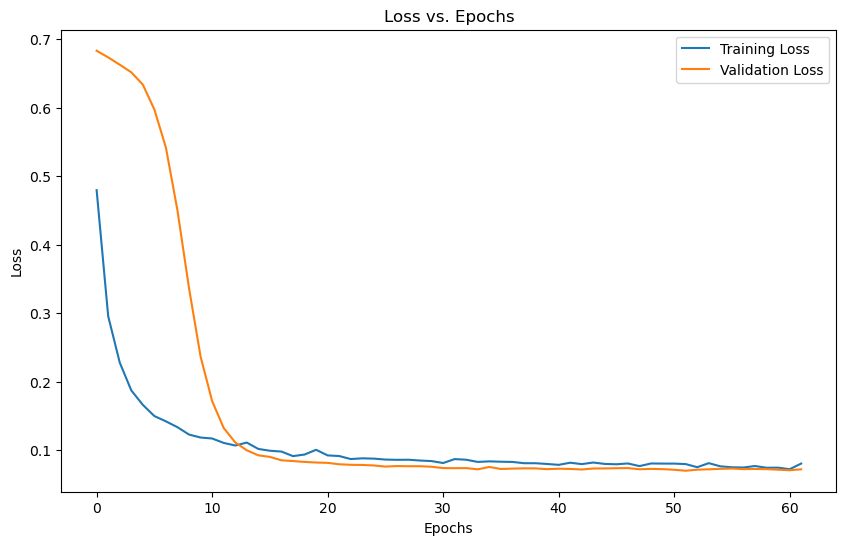

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

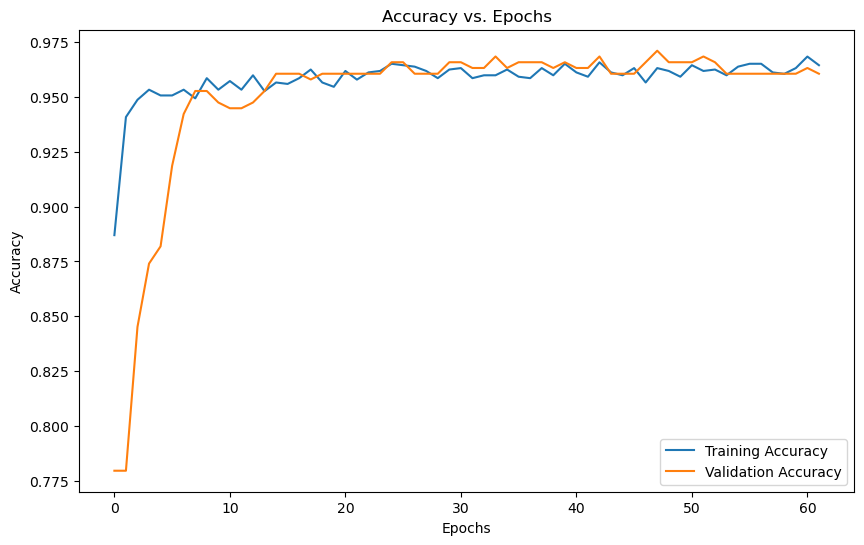

In [104]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 16s 119ms/step - loss: 0.3627 - val_loss: 0.2632
Epoch 2/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - loss: 0.2578 - val_loss: 0.2526
Epoch 3/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 0.2497 - val_loss: 0.2349
Epoch 4/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - loss: 0.2459 - val_loss: 0.2300
Epoch 5/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.2203 - val_loss: 0.2211
Epoch 6/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - loss: 0.2149 - val_loss: 0.2183
Epoch 7/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2084 - val_loss: 0.2119
Epoch 8/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2219 - val_loss: 0.2194
Epoch 9/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.1975 - val_loss: 0.2136
Epoch 10/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 0.2000 - val_loss: 0.2175
Epoch 11/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.1914 - val_loss: 0.2223
Epoch 12/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/st

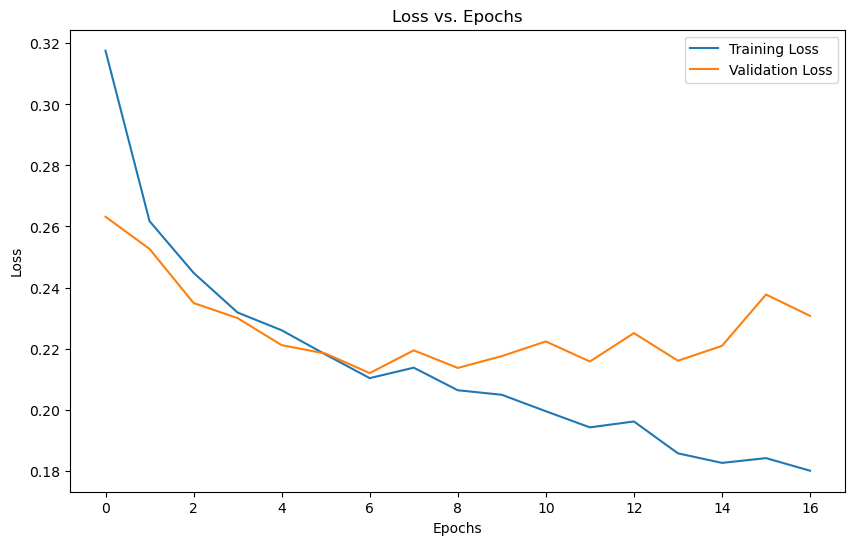

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step


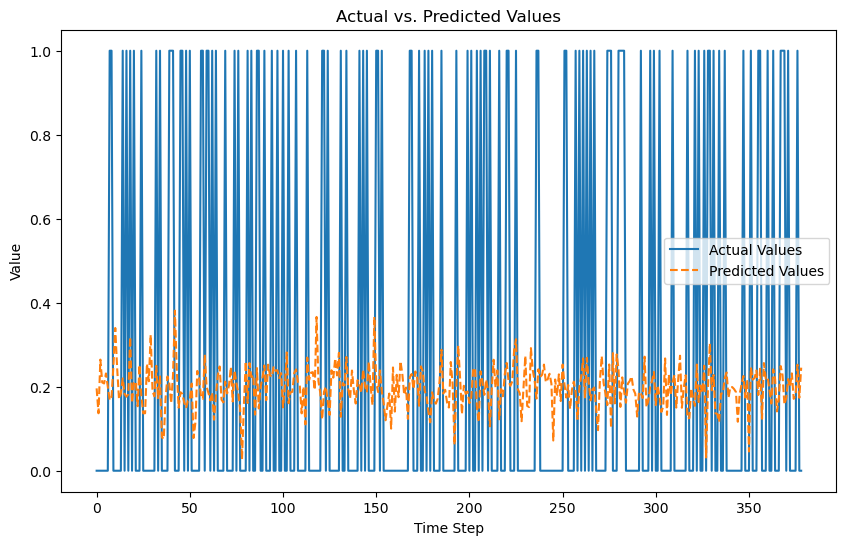

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load data
normal_data = pd.read_csv('Normal.csv')
vulnerable_data = pd.read_csv('vulnerable.csv')

# Label data
normal_data['target'] = 0  # Normal data is labeled as 0
vulnerable_data['target'] = 1  # Vulnerable data is labeled as 1

# Concatenate and shuffle data
data = pd.concat([normal_data, vulnerable_data], axis=0)
data = data.sample(frac=1).reset_index(drop=True)

# Prepare features and target
X = data.drop(columns=['target', 'Time'], errors='ignore')  # Drop 'Time' if it exists, ignore if not
y = data['target']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the number of time steps for the look-back period
look_back = 10

# Prepare data for time series forecasting
def create_sequences(X, y, look_back):
    Xs, ys = [], []
    for i in range(len(X) - look_back):
        Xs.append(X[i:i + look_back])
        ys.append(y[i + look_back])
    return np.array(Xs), np.array(ys)

X_sequences, y_sequences = create_sequences(X_scaled, y, look_back)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, random_state=42)

# Build LSTM model for forecasting
model = Sequential()
model.add(LSTM(units=256, return_sequences=True, input_shape=(look_back, X_train.shape[2])))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(LSTM(units=128, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(LSTM(units=64))
model.add(Dropout(0.1))
model.add(Dense(1))  # Output is a single forecasted value

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
y_pred = model.predict(X_test)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values', linestyle='--')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()
